<a href="https://colab.research.google.com/github/architvasan/BSD_Workshop/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and preprocessing methods

Install required modules

In [2]:
!pip install pandas
!pip install transformers
!pip install SmilesPE
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## General preprocessing methods

In [27]:
import pandas as pd
from io import StringIO
# StringIO - It is only used for the purpose of illustration,so that the csv_data will behave as if it was present in our Disk.

In [28]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
9.0,10.0,11.0,
'''

In [29]:
df = pd.read_csv(StringIO(csv_data))

In [30]:
df

A     B     C    D
0  1.0   2.0   3.0  4.0
1  5.0   6.0   NaN  8.0
2  9.0  10.0  11.0  NaN

### Using Imputer

In [6]:
!pip install scikit-learn

In [33]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(strategy='median')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11.,  6.]])

### Dealing with categorical data

In [34]:
# Categorical Data -
# ordinal - It can be ordered ex. - M<L<XL
# nominal - It can't be ordered ex. - Color of a shirt . We can't say Red>Blue
df_cat = pd.DataFrame(data =
                     [['green','M',10.1,'class1'],
                      ['blue','L',20.1,'class2'],
                      ['white','M',30.1,'class1']])
df_cat.columns = ['color','size','price','classlabel']
df_cat

color size  price classlabel
0  green    M   10.1     class1
1   blue    L   20.1     class2
2  white    M   30.1     class1

### Using LabelEncoder

In [36]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df_cat['classlabel'] = class_le.fit_transform(df_cat['classlabel'].values)
df_cat

color  size  price  classlabel
0  green     1   10.1           0
1   blue     2   20.1           1
2  white     1   30.1           0

In [37]:
# If we use the same mapping strategy that we used with ordinal feature like 'Size', then we are actually misleading our model
# into believing that there is some sort of relationship between the various colors. So if use-
# blue = 0 and green = 1, Then the model will still think of it as some sort of a relationship like green>blue which doesn't make any sense.
# But the model might still produce some results based on this but those results won't be optimal for us
# Using get_dummies() for One-Hot Encoding
pd.get_dummies(df_cat[['color','size','price']])

size  price  color_blue  color_green  color_white
0     1   10.1       False         True        False
1     2   20.1        True        False        False
2     1   30.1       False        False         True

In [38]:
pd.get_dummies(df_cat[['color','size','price']],drop_first=True)

size  price  color_green  color_white
0     1   10.1         True        False
1     2   20.1        False        False
2     1   30.1        False         True

## Image data preprocessing

In [5]:
!pip install torchvision

### Clone the following github repo which includes vocabulary + image for preprocessing:
https://github.com/architvasan/BSD_Workshop

In [7]:
!git clone https://github.com/architvasan/BSD_Workshop.git

Cloning into 'BSD_Workshop'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 4), reused 19 (delta 4), pack-reused 0
Receiving objects: 100% (22/22), 644.94 KiB | 2.42 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
import torch, torchvision

In [8]:
from PIL import Image
cat_image = Image.open("BSD_Workshop/pexels-kmerriman-20787.jpg")

#### Image of a cute cat!

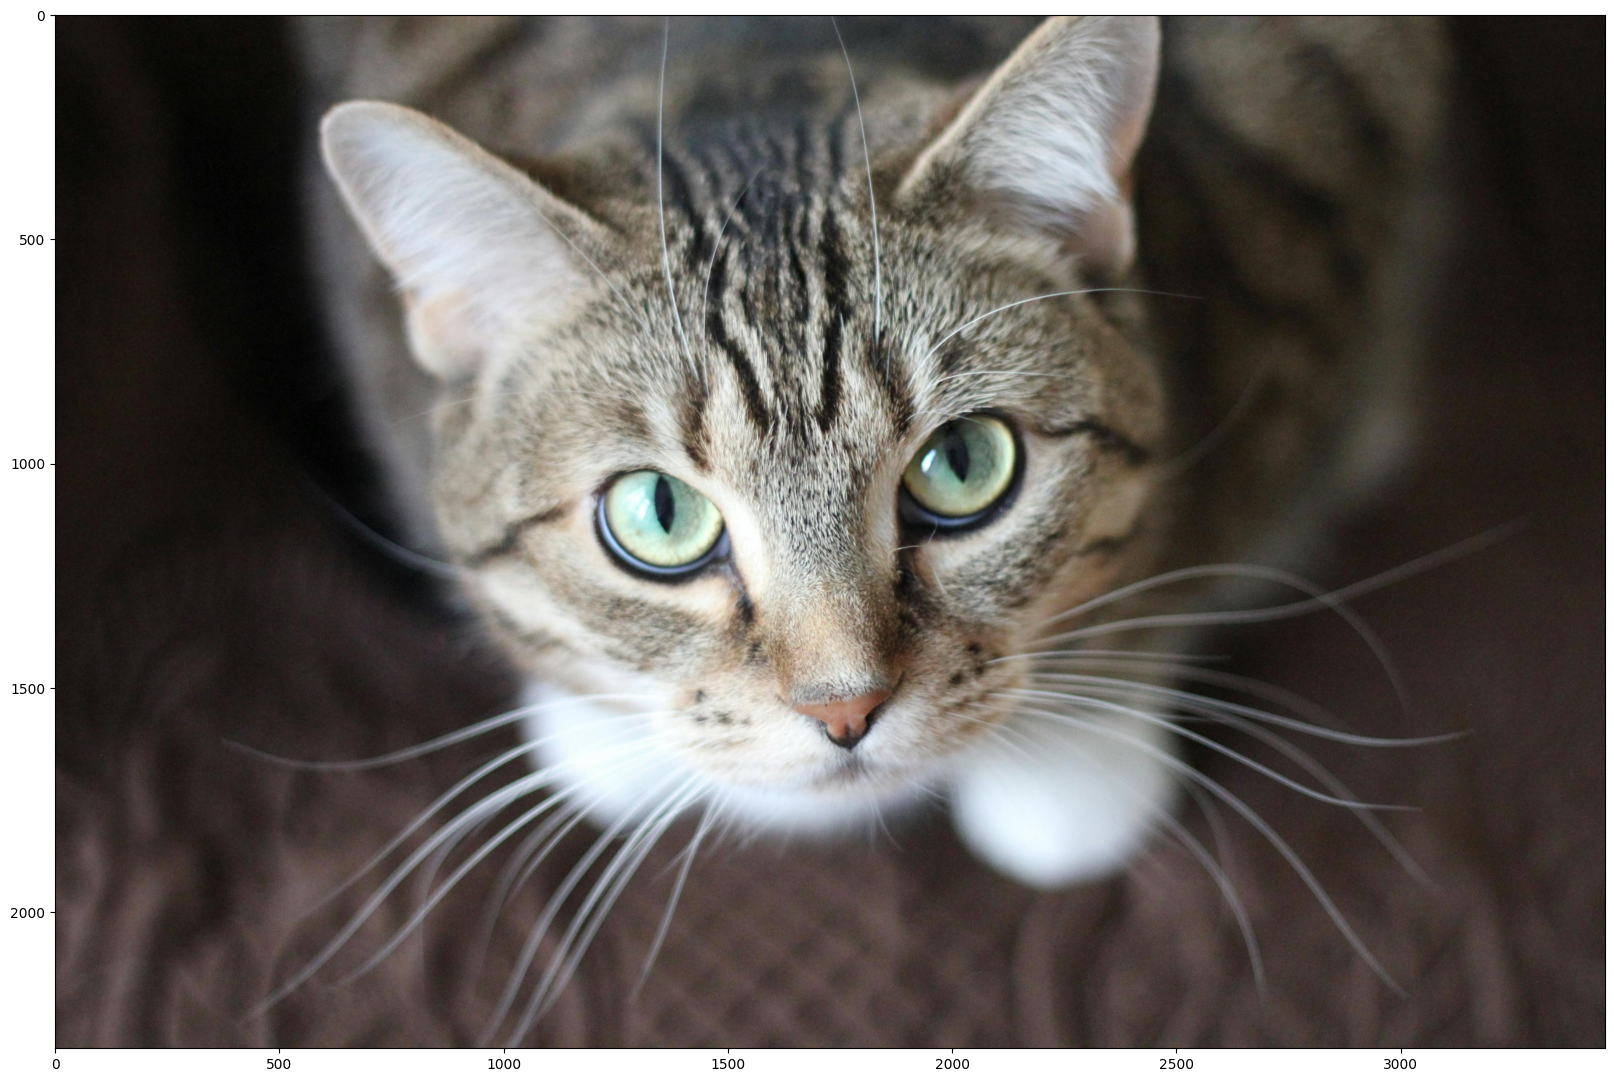

In [12]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(20,20))
plt.imshow(cat_image)
plt.show()

#### Applying convolutions onto the cat image

torch.Size([1, 3, 2290, 3442])
torch.Size([1, 3, 2304, 3456])


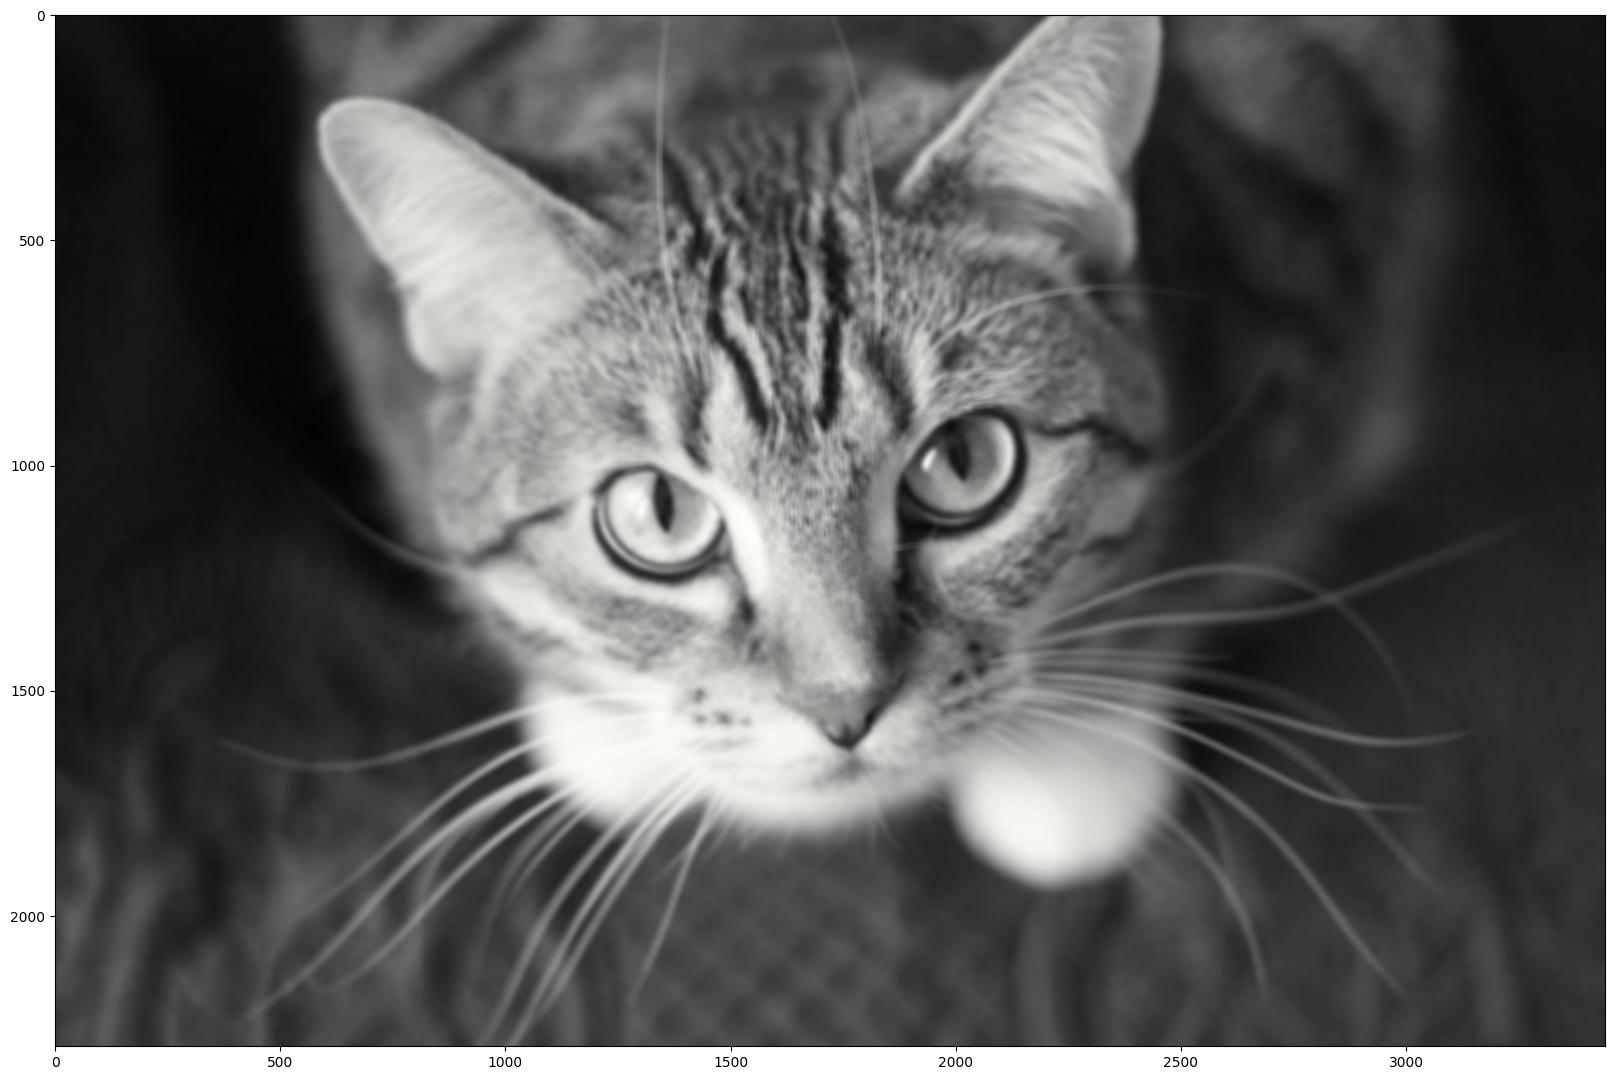

In [13]:
# Let's apply a convolution to the cat photo:
cat_tensor = torchvision.transforms.ToTensor()(cat_image)

# Reshape the tensor to have a batch size of 1:
cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)

# Create a random convolution:
# shape is: (channels_in, channels_out, kernel_x, kernel_y)
conv_random = torch.rand((3,3,15,15))

cat_rand = torch.nn.functional.conv2d(cat_tensor, conv_random)
cat_rand = (1./cat_rand.max()) * cat_rand
print(cat_rand.shape)
cat_rand = cat_rand.reshape(cat_rand.shape[1:])

print(cat_tensor.shape)

rand_image = cat_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)

#### Normalization of the image to standard values (between 0-1)

torch.Size([1, 3, 2304, 3456])


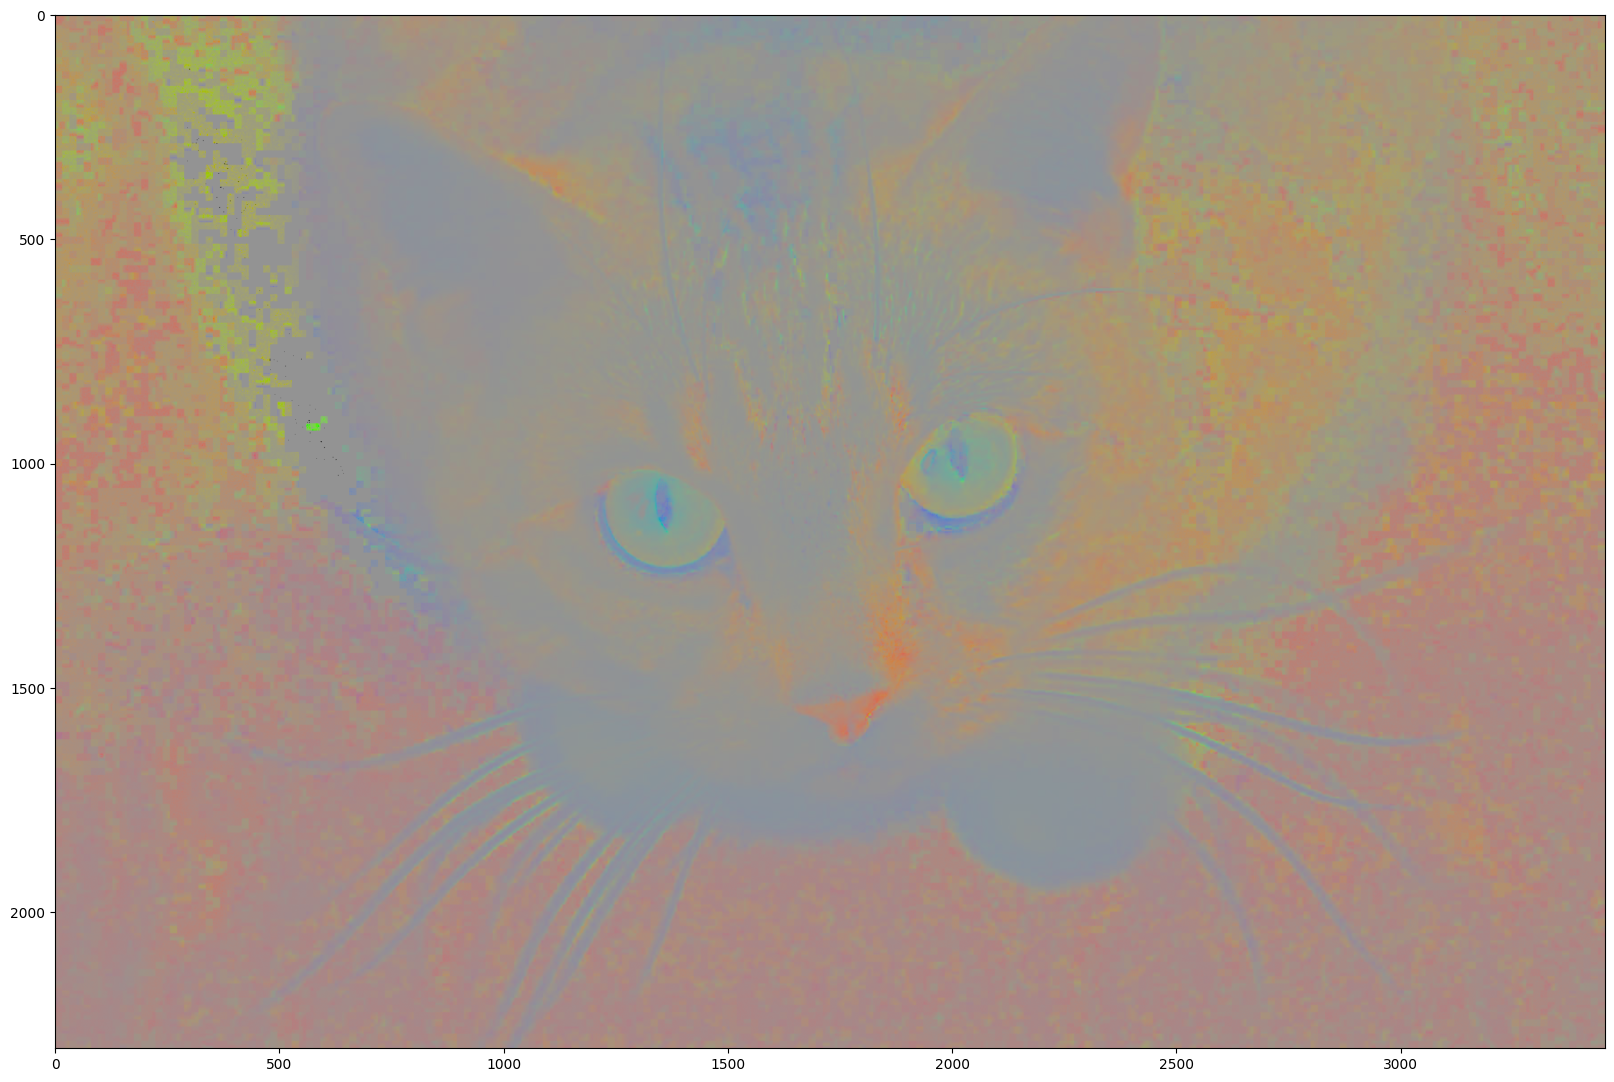

In [15]:
# Let's apply a normalization to the cat photo:
cat_tensor = torchvision.transforms.ToTensor()(cat_image)

# Reshape the tensor to have a batch size of 1:
cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)

cat_rand = torch.nn.functional.normalize(cat_tensor)
cat_rand = cat_rand.reshape(cat_rand.shape[1:])

print(cat_tensor.shape)

rand_image = cat_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)

## Graph data preprocessing

### Creating a simple graph using torch_geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.7 MB/s eta 0:00:00


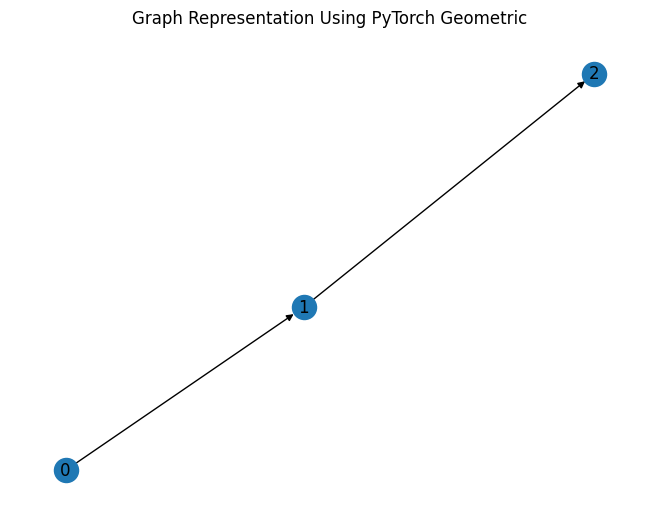

In [1]:
# install torch-geometric
!pip install torch-geometric -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html

# import libraries
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# Define edge indices and node features
edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long)
x = torch.tensor([[1], [2], [3]], dtype=torch.float)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index.t().contiguous())

# Convert to NetworkX graph
G = to_networkx(data)

# Visualize the graph
nx.draw(G, with_labels=True)
plt.title("Graph Representation Using PyTorch Geometric")
plt.show()

### Loading Protein-protein interaction data into the notebook

In [20]:
import time
import torch
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.datasets import PPI
from torch_geometric.nn import GCNConv


if torch.cuda.is_available():
    device = torch.device('cuda')
elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [23]:
dataset = PPI(root='./')
data = dataset[0].to(device)


transform = T.GDC(
    self_loop_weight=1,
    normalization_in='sym',
    normalization_out='col',
    diffusion_kwargs=dict(method='ppr', alpha=0.05),
    sparsification_kwargs=dict(method='topk', k=128, dim=0),
    exact=True,
)
data = transform(data)

Extracting ./ppi.zip
Processing...
Done!


In [25]:
print(data)

Data(x=[1767, 50], edge_index=[2, 226176], y=[1767, 121], edge_attr=[226176])


## Preprocessing for text data

### Tokenizer settings

Here, we set the vocab and spe file for the SMILES_SPE_Tokenizer.

This tokenizer implements the popular byte-pair encoder tokenizer for SMILES strings to learn key chemical motifs.

We create a preprocess function allowing us to load data into this tokenizer.

Refer to: \
 **Li, X. and Fourches, D., 2021. SMILES pair encoding: a data-driven substructure tokenization algorithm for deep learning. Journal of chemical information and modeling, 61(4), pp.1560-1569.**

In [11]:
import BSD_Workshop.ST_funcs

In [17]:
from BSD_Workshop.ST_funcs.smiles_pair_encoders_functions import *
from itertools import chain, repeat, islice

In [15]:
vocab_file = 'BSD_Workshop/VocabFiles/vocab_spe.txt'
spe_file = 'BSD_Workshop/VocabFiles/SPE_ChEMBL.txt'
tokenizer = SMILES_SPE_Tokenizer(vocab_file = vocab_file, spe_file = spe_file)
maxlen = 45

In [18]:
def pad_infinite(iterable, padding=None):
   return chain(iterable, repeat(padding))

def pad(iterable, size, padding=None):
   return islice(pad_infinite(iterable, padding), size)

In [19]:
from tqdm import tqdm
def preprocess(data, tokenizer, maxlen):

    tokenized_data = np.array([list(pad(tokenizer(smi)['input_ids'], maxlen, 0)) for smi in tqdm(data)])

    return tokenized_data

In [20]:
print('[SEP]')
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
file1 = open(vocab_file, 'r')
Lines = file1.readlines()
smiles = 'OC(=O)c1ccccc1C(=O)N'
tok_ex = list(pad(tokenizer(smiles)['input_ids'], maxlen, 0))
for tok in tok_ex[1:]:
    if tok!=0:
      print(Lines[tok])

[SEP]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 30.3 MB/s eta 0:00:00
OC(=O)

c1ccccc1

C(=O)N

[SEP]



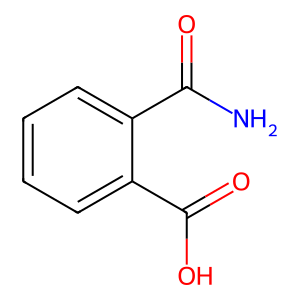

In [21]:
m = Chem.MolFromSmiles('OC(=O)c1ccccc1C(=O)N')
Draw.MolToImage(m)

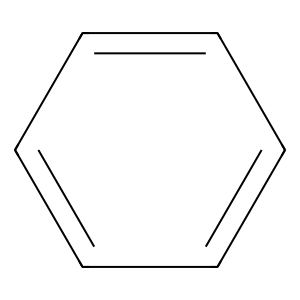

In [22]:
m = Chem.MolFromSmiles('c1ccccc1')
Draw.MolToImage(m)

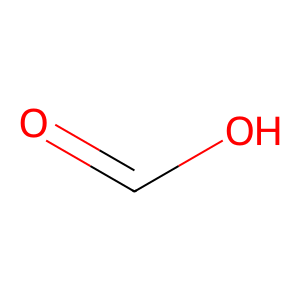

In [23]:
m = Chem.MolFromSmiles('OC(=O)')
Draw.MolToImage(m)

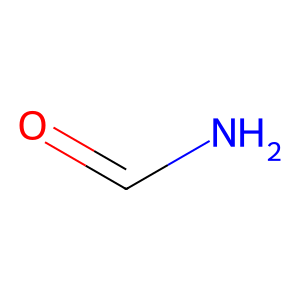

In [24]:
m = Chem.MolFromSmiles('C(=O)N')
Draw.MolToImage(m)